#### Dataset Preparation

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_wine()
x = dataset.data
y = dataset.target

In [4]:
print(f"target names: {dataset.target_names}")
print(f"DESCR:\n{dataset.DESCR}")

target names: ['class_0' 'class_1' 'class_2']
DESCR:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3

In [5]:
df = pd.DataFrame(x, columns=dataset.feature_names)
df["y"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### CART Classifier

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10]
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10]})

In [8]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4}
Score of best model: 0.9365384615384615


#### Train Best Model

In [9]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print(f"Accuracy: {score}")

Accuracy: 0.9444444444444444


In [10]:
# graphviz
from sklearn.tree import plot_tree

[Text(167.40000000000003, 195.696, 'X[9] <= 3.82\ngini = 0.658\nsamples = 124\nvalue = [40, 50, 34]'),
 Text(100.44000000000001, 152.208, 'X[11] <= 3.82\ngini = 0.083\nsamples = 46\nvalue = [2, 44, 0]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 3.07\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(100.44000000000001, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(133.92000000000002, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(234.36, 152.208, 'X[6] <= 1.4\ngini = 0.567\nsamples = 78\nvalue = [38, 6, 34]'),
 Text(200.88000000000002, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(267.84000000000003, 108.72, 'X[12] <= 724.5\ngini = 0.236\nsamples = 44\nvalue = [38, 6, 0]'),
 Text(234.36, 65.232, 'X[1] <= 3.92\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(267.84000

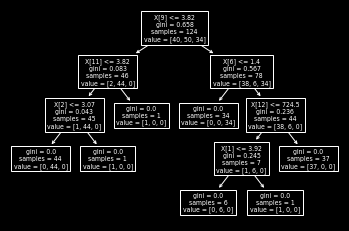

In [11]:
plot_tree(clf)